죄의 삯은 사망이요 하나님의 은사는 그리스도 예수 우리 주 안에 있는 영생이니라 (롬6:23)

----
<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/bannergreen.png?raw=true" width=1000></center>

**NOTE:** The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# Image Processing using Machine Learning

이번 자료에서는 머신러닝을 사용하여 영상처리 분야에 적용해보는 실습을 진행하도록 하겠습니다.
~~~
1. 영상처리란 무엇인가?
2. 머신러닝의 개요 (Outline)
3. 실습
~~~

# 영상처리란 무엇인가?


위키피디아에서 정의하는 영상처리는 다음과 같습니다.  
_영상 처리(Image processing) 또는 화상 처리는 넓게는 입출력이 영상인 모든 형태의 정보 처리를 가리키며, 사진이나 동영상을 처리하는 것이 대표적인 예이다._

먼저 영상처리란 컴퓨터비전 분야에서 주로 다루어지는 task/field 입니다. 이때 영상이란 image를 의미하고, video는 동영상이라고 부릅니다. 영상처리를 가장 쉽게 설명하라고 한다면 아마 '포토샵'을 떠올리시면 쉽게 이해할 수 있을 것 같습니다. 아마 모두들 포토샵을 사용하여 인물 사진에서 잡티와 여드름을 제거하고, 주름을 없애거나 더 깔끔한 피부톤으로 만드는 등의 과정을 거치는 모습을 본적이 있을 것입니다. 한 영상을 회전, 확대, 자르기, 반전효과, blur 등의 다양한 '처리(processing)'를 거쳐 우리가 원하는 형태로 영상을 만드는 것을 영상 처리라고 부릅니다.  

이러한 영상처리는 다양한 분야에 사용되고 있으며 다양한 문제를 푸는데에 사용됩니다. 예를 들어,  
* Image Segmentation (or Semantic Segmentation): 영상 내에서 같은 의미를 갖는 부분을 묶어주는 문제
* Super Resolution: 저화질의 영상을 고화질의 영상으로 복원하는 문제
* Object Detection: 영상 내에서 다양한 물체를 탐지하는 문제
* Noise Reduction (or Image Enhancement): 영상의 노이즈를 제거하는 문제
* Image Generation: 새로운 영상을 생성해내는 문제
* Image Classificiation: 영상을 특정 클래스/레이블로 분류하는 문제 
* ...  

위와 같은 문제들이 존재하고, 이는 각각 일반적인 자연 영상에서의 적용, 의료 영상의 적용, 인물 영상의 적용 등등 다양한 분야와 데이터에 적용할 수 있습니다.

# 머신러닝의 개요 (Outline)

사람들마다 머신러닝을 코딩하는 방법은 전부 다릅니다. 하지만, 다음과 같은 큰 틀은 모두 동일하게 가지고 있습니다.

~~~
1) Problem Definition & Dataset 준비
2) Data Loader
3) Model Architecture
4) Loss & Optimizer
5) Traininig & Testing
~~~

## Problem Definition & Dataset 준비

먼저 우리가 풀고자하는 문제와 이에 적합한 데이터를 구성 및 준비하는 것이 중요합니다. 기본적으로 __MNIST__ 와 같이 유명한 데이터셋은 여러 오픈 프레임워크에서 직접 제공을 하거나 쉽게 활용할 수 있도록 툴을 제공합니다. 예를 들어, Pytorch에서 제공하는 torchvision.datasets 페키지 안에는 MNIST를 포함한 여러 데이터셋을 제공하고 있으며, 간단한 argument를 사용해 데이터를 다운받을 수 있거나 이미 다운로드 한 데이터를 train, validation, 그리고 test 세트로 분류해주는 등의 역할을 수행해줍니다.  

만약 유명한 데이터셋을 사용하지 않거나 내가 직접 만든 데이터셋을 사용하여 문제를 해결하고 싶을 경우, torch.utils.data의 Dataset과 같은 모듈을 사용하여 custom dataset을 만드실 수 있습니다. Custom dataset을 만드는 방법은 다음과 같습니다.

```python
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self): # 데이터셋의 초기화 및 전처리를 해주는 부분
        self.x_data = []
        self.y_data = []
    
    def __len__(self): # 데이터셋의 길이/샘플의 수를 반환
        return len(self.x_data)

    def __getitem__(self, idx): # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y
```
torch.utils.data.Dataset 모듈을 사용하여 기본적으로 init, len, getitem 함수를 만들어주면 됩니다.

### Data Loader

Dataloader는 앞서 정의한 Dataset에서 데이터를 순차적으로 꺼내오는 sampler 역할을 수행합니다. 일반적으로 torch.utils.data.Dataloader 페키지를 사용하여 각 mini-batch 단위로 training data와 그의 label을 동시에 꺼내오게 됩니다. 만약 본인의 데이터가 data와 label 쌍으로 이루어지지 않았거나 3개 이상의 데이터를 동시에 활용해야 한다면 위에서 설명드린 CustomDataset을 정의한 후 DataLoader에게 넘겨주면 \_\_getitem__ 함수로 인해 적절히 sampling 되게 됩니다.


<code>from torch.utils.data import DataLoader</code><br>
<code>DataLoader(dataset, batch_size=2, shuffle=True)</code>

### Model Architecture

다음은 Model Architecture 입니다. 우리가 해결하고자 하는 문제를 적절히 해결할 수 있도록 머신러닝 모델을 설계하는 부분입니다. 강의에서 배운 가장 간단한 Single Layer Perceptron을 비롯하여 Multi-Layer Perceptron 등 다양한 모델을 설계할 수 있으며 이를 얼마나 잘 설계하냐에 따라 성능, 연산량, 속도 등이 결정되게 됩니다.  

이때, 해결하고자 하는 문제에 적합하도록 출력의 형태를 맞춰주는 것이 중요합니다. 예를 들어, 강의에서 배운 MNIST Classification을 하기 위해선 최종 레이어에 softmax를 더하여 데이터가 0~9에 해당할 확률을 나타내주었듯이, 우리가 해결하고자 하는 문제에 따라 그 형태 역시 달라져야합니다.

### Loss & Optimizer

학습에 사용될 Loss function과 Optimizer를 선택해야 합니다. 이는 모델이 얼마나 효과적으로 학습할 수 있는가에 매우 밀접한 연관이 있기 때문에 어떤 것을 선택하고 어떤 조합으로 사용하느냐에 따라 성능이 차이가 날 수 있습니다. 강의에서 배운 Learning rate 조절, 여러 손실 함수 등을 선택하는 것이 이 부분에 해당합니다.

가장 대표적으로 사용되는 Loss function과 Optimizer는 다음과 같습니다.  

__Loss Function:__
* L1 loss (MAE Loss)
* Mean-Squared Error loss (MSE Loss)
* Cross Entropy loss (CE Loss)
* Binary Cross Entropy loss (BCE Loss)

__Optimizer:__
* Adagrad
* Adam
* RMSprop
* Stochastic Gradient Descent (SGD)


### Traininig & Testing

이제 본격적으로 학습과 테스트를 진행합니다. 준비된 DataLoader를 반복적으로 실행시켜 mini-batch 단위로 학습을 진행할 수 있습니다. 이는 희망하는 epoch 수 만큼 반복하게 됩니다. 일반적으로 학습시 사용되는 용어로, iteration과 epoch를 쉽게 혼용될 수 있습니다. 먼저 epoch란, 모든 데이터를 1회 사용하여 학습이 이루어진 단위를 나타냅니다. 이에 반해, iteration은 해당 epoch에서 몇개의 mini-batch를 학습하였는가를 나타내는 단위입니다. 쉽게 생각하여 1000개로 이루어진 데이터셋이 있다고 가정해보겠습니다. 만약 mini-batch로 10개씩 사용한다고 가정한다면, 우리는 1 epoch를 학습하기 위하여 총 100회의 iteration을 학습시켜야 할 것입니다. 우리가 우리의 모델을 20 epoch 학습시켰다고 한다면, 이는 총 2000번의 iteration을 학습시켰다고 할 수 있을 것입니다.

# 실습

이번 실습에서는 Pytorch 프레임워크를 사용하여 Image Classification 문제를 풀어볼 것입니다. 이를 위한 데이터로는 pytorch에서 제공하는 CelebA 라는 데이터셋을 활용하겠습니다.

먼저 이번 실습을 위해 필요한 패키지는 다음과 같습니다.
<code>
 conda install torchvision
</code>

## Problem Definition & Dataset 준비

Image Classification과 Image Segmentation 문제에서 많이 사용되는 데이터셋 중 하나인 CelebA를 다운로드 및 준비하려고 합니다. 밑의 코드는 torchvision 페키지에서 제공하는 함수로 데이터를 직접 다운받는 방법입니다. 단, 서버의 문제 등으로 다운로드가 되지 않을 수 있습니다. 이러한 경우, https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html 혹은 https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg 에서 직접 다운받아서 원하는 파일 경로에 이동시킨 뒤 사용하시면 됩니다.

데이터 폴더 위치는 현재 파일(CV_ML.ipynb)이 있는 폴더 내에 data라는 폴더를 만들어서 넣으시면 됩니다.

ex) KMOOC-ML -> codelab -> data  

|**[KMOOC-ML]**  
|---- [ipynb]  
|-------- [code]  
|-------- [data]  
|-------- [images]  
|-------- \*.ipynb files  
|---- [pdf]  
|-------- \*.pdf files  
|---- [python]  
|-------- \*.ipynb files  
|-------- \*.pdf files  
|---- **[codelab]**  
|-------- CV_ML.ipynb  
|-------- **[data]**  


먼저 학습을 위해 사용되는 Training dataset을 만들어보도록 하겠습니다. 우리는 torchvision.datasets에서 제공하는 CelebA를 사용하려고 합니다. CelebA 데이터셋은 총 202,599개의 데이터로 구성되어있고, 이는 다시 train, validation, test dataset으로 각각 162,770개, 19,962개, 19,867개로 구성되어있습니다.  CelebA의 인자로 넘겨주는 split은 데이터의 종류를 나타냅니다. CelebA는 데이터셋이 학습데이터냐 테스트 데이터냐에 따라 구분할 수 있도록 text파일을 함께 제공하기 때문에 split 인자에 'train'과 같은 식으로 넘겨주면 자동적으로 데이터를 로딩하게됩니다. 다음으로 transform 인자는 해당 데이터를 변환시켜주는 작업을 합니다. Pytorch와 같은 여러 딥러닝 프레임워크에 적합하도록 tensor 형태로 바꿔준다거나 영상의 크기를 바꾼다는 등의 전처리 작업을 진행할 수 있습니다.

__Expected output:<br>162770__

In [1]:
import torch
from torchvision.datasets import CelebA
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.Resize((256,128)), transforms.ToTensor()])

# If you don't have the data downloaded
# train_dataset = CelebA('./data', split='train', download=True)

# If you do have the data downloaded
train_dataset = CelebA('./data', split='train', transform=transform, download=False)
print(len(train_dataset))

162770


위와 같은 방법으로 test_dataset과 val_dataset을 만들어보세요. 또한, 만들어진 데이터셋의 크기를 확인하여 test와 validation 데이터셋에는 각각 몇개의 데이터가 들어가있는지 확인해보세요.

__Expected output:<br>19962<br>19867__

In [2]:
test_dataset = CelebA('./data', split='test', transform=transform, download=False)
print(len(test_dataset))

val_dataset = CelebA('./data', split='valid', transform=transform, download=False)
print(len(val_dataset))

19962
19867


다음은 아주 중요한 과정입니다. 바로 데이터가 제대로 구성되어있는지 확인하는 작업입니다. 만약 이 과정을 거치지 않고 빠르게 넘어간다면, 데이터가 잘못된 순서로 들어가 있다거나 아예 다른 데이터가 들어가게 되어 나중에 학습을 하는 가운데 엉뚱한 결과가 나오게 될 수 있습니다. 그렇게 된다면 error를 잡기 위해서 model architecture을 고친다거나 loss function & optimizer를 수정하는 등의 불필요한 시간을 많이 소비하게 될 수 있습니다.

먼저 우리는 영상 데이터를 사용하기 때문에 이를 시각화하여 확인할 수 있습니다.  
<code>matplotlib.pyplot</code>과 <code>torchvision.transforms.functional.to_pil_image</code>를 사용하여 아래 이미지와 같이 출력되도록 코딩해보세요.



__Expected output:__

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/CelebA_example.png?raw=true" title="CelebA_example" width=1024 height=512>    
</figure>

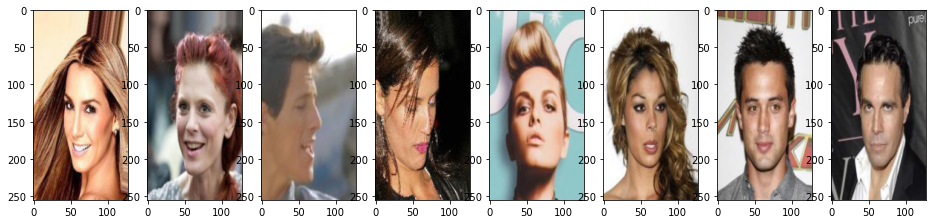

In [3]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

plt.figure(figsize=(16,8))
for i in range(8):
    img = to_pil_image(train_dataset[i][0])
    plt.subplot(1,8,i+1)
    plt.imshow(img)
plt.show()

### Data Loader

다음으로 DataLoader를 구성하려고 합니다. 현재 우리 데이터는 연예인 영상과 그 영상에 해당하는 40개의 attribute 리스트를 사용합니다. 따라서, 특별히 DataLoader의 수정이 없이 쉽게 구성할 수 있습니다.

<code>torch.utils.data.DataLoader</code>를 사용하여 train_dataloader, test_dataloader, val_dataloader를 구현해보세요.

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


## Model Architecture

다음은 Model Architecture 입니다. 먼저 가장 간단한 예시로 Linear layer로만 구성된 Multi-layer Perceptron을 만들어보도록 하겠습니다. 모델 구조는 다음과 같은 구성으로 만들어집니다.

```python
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #self.layer = nn.Linear()
        
    def forward(self, x):
        #out = self.layer(x)
        return out
```

위에서 \_\_init__함수는 Model 클래스를 호출할 경우 자동적으로 불리는 함수입니다. 이곳에서 우리는 layer 등을 포함한 다양한 구성을 정의할 수 있습니다. 이때, 우리는 학습을 더욱 안정적으로 하기 위하여 init_weight()라는 보조함수를 만들어 각 layer의 weight를 He uniform initialization으로 초기화하도록 하겠습니다.

He uniform initialization이란 Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification - He, K. et al. (2015)에서 제안된 가중치 초기화 방법론 중 하나이다. He initialization을 사용하게 되면 weight tensor가 U(−bound,bound)의 값을 가지게 되며, 이때 bound는 다음과 같이 정의됩니다.
$bound = gain \times \sqrt{\frac{3}{fan\_mode}}$  
자세한 설명은 https://pytorch.org/docs/stable/nn.init.html 에서 확인할 수 있습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/mlp.png?raw=true" title="mlp" width=512 height=512>    
    <center><figcaption>Figure1. Architecture of our MLP</figcaption><center>
</figure>

In [6]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, in_ch, hid_ch, out_ch,):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(in_ch*256*128, hid_ch*2)
        self.layer2 = nn.Linear(hid_ch*2, hid_ch)
        self.layer3 = nn.Linear(hid_ch, out_ch)
        self.init_weight()
        
    def init_weight(self):
        nn.init.kaiming_uniform_(self.layer1.weight.data)
        nn.init.kaiming_uniform_(self.layer2.weight.data)
        nn.init.kaiming_uniform_(self.layer3.weight.data)
        
    def forward(self, x):
        x1 = self.layer1(x.view(32,-1))
        x2 = self.layer2(x1)
        out = self.layer3(x2)

        return out

위 MLP 코드를 보면 알 수 있듯이, init함수에는 모델에 사용될 구성품들을 정의하게 되고, forward함수에서는 위에 정의된 구성품(layer 등)을 활용하여 학습 과정을 설계하게 됩니다. 이후에 우리는 조금 더 복잡한 모델을 구성해볼 것이니 위 코드를 잘 보길 바랍니다. 특히 forward의 각 라인별 결과물의 shape을 출력하여 확인하는 것은 큰 도움이 될 것입니다.

### Loss & Optimizer

다음으로는 loss function과 optimizer를 정의해야한다. 우리는 잘 알려진 MSE loss function과 Adam optimizer를 사용할 것입니다.
<code>torch.optim.Adam</code>과 <code>torch.nn.MSELoss</code>를 사용하여 구현하여보세요. _(learning rate는 0.0001, weight decay rate은 0.00001로 설정하세요.)_

In [ ]:
import torch.optim as optim
import numpy as np

model = MLP(3,256,40)
# model1 = Encoder(3,128,40)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001)
loss_function = nn.MSELoss()


## Traininig & Testing

이제 본격적으로 모델을 학습할 수 있도록 코드를 구현해보겠습니다. 일반적으로 학습에 사용되는 코드의 구조는 다음과 같습니다.

```python
for i in range(epoch):
    print("Epoch ", i+1)
    
    model.train()
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval()
    for X_val, Y_val in val_dataloader:
        pred = model(X_val)

        accuracy = 100 * np.sum(np.equal(pred, Y_val).numpy(), axis=1) / len(Y_val)
        acc.append(accuracy)
        
    print("accuracy:", end=" ")
    print(np.mean(acc))
```

먼저 주의해서 볼 것은 train과 test/validation의 차이점입니다. Training 과정에서는 loss를 구한 이후 back-propagation 과정을 하는 반면 test/validation 과정에서는 그러한 과정이 없이 prediction의 정확도를 구하는 과정이 이루어집니다.

In [9]:
for i in range(10):
    print("Epoch ", i+1)
    
    model.train()
    print("###Training###")
    count = 0
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train.float())
        if count%20==0: print(loss.item(), end=' | ')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
        if count == 100: break
        
    model.eval()
    print("\n###Validation###")
    acc = []
    count = 0
    for X_val, Y_val in val_dataloader:
        pred = model(X_val)
        bin_pred = np.where(pred>=0.5, 1, 0)
        accuracy = 100 * np.sum(np.sum(np.equal(bin_pred, Y_val).numpy(), axis=1), axis=0) / (len(Y_val)*40)
        acc.append(accuracy)
        
        count+=1
        if count == 20: break
            
    print("Final acc:", end=" ")
    print(np.mean(acc))

Epoch  1
###Training###
1.8563783168792725 | 33.24920654296875 | 5.355579853057861 | 1.0762078762054443 | 0.46531906723976135 | 
###Validation###
Final acc: 72.7421875
Epoch  2
###Training###
0.31643351912498474 | 0.3089677691459656 | 0.28142356872558594 | 0.30321550369262695 | 0.24645057320594788 | 
###Validation###
Final acc: 71.53125
Epoch  3
###Training###
0.3275538384914398 | 0.2754356861114502 | 0.2696867883205414 | 0.2833743989467621 | 0.23660603165626526 | 
###Validation###
Final acc: 70.53515625
Epoch  4
###Training###
0.5502158999443054 | 1.8939615488052368 | 0.7407462000846863 | 0.6201087236404419 | 0.43733930587768555 | 
###Validation###
Final acc: 73.70703125
Epoch  5
###Training###
0.41589170694351196 | 0.6421312689781189 | 0.31142890453338623 | 1.0487089157104492 | 1.8769066333770752 | 
###Validation###
Final acc: 59.15234375
Epoch  6
###Training###
5.4908318519592285 | 1.6110671758651733 | 0.8782109022140503 | 1.089712381362915 | 0.796751081943512 | 
###Validation###
Fi

이제 우리는 새로운 형태의 모델을 설계해볼 것입니다. 영상처리에서는 대표적으로 사용되는 구조인 Encoder를 구현해보겠습니다. Encoder는 일반적으로 영상을 효과적으로 압축하기 위하여 사용됩니다. 이는 Convolution과 Pooling 과정을 반복적으로 수행하여 기존 영상의 정보를 최대한 손실하지 않으면서 데이터의 크기를 압축시킬 수 있게 됩니다. 특히 convolution 과정을 통하여 데이터를 압축함과 동시에 네트워크가 더 많은 수의 feature들을 뽑아낼 수 있기 때문에 더욱 다양한 정보를 효과적으로 가질 수 있게 됩니다. 먼저 convolution과 pooling 과정의 예시를 Figure 2,3을 통해 볼 수 있습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/convolution.gif?raw=true" title="convolution" width=300 height=300>    
    <center><figcaption>Figure2. Example of convolution in image processing</figcaption><center>
</figure>

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/pooling_example.png?raw=true" title="pooling" width=300 height=300>    
    <center><figcaption>Figure3. Example of pooling layer in image processing</figcaption><center>
</figure>

Figure 4는 일반적으로 영상 압축 및 복원에 많이 사용되는 Auto Encoder를 그림으로 나타낸 것입니다. Auto Encoder는 encoder와 decoder로 구성되어 있으며, 이는 각각 영상 압축과 복원을 수행합니다. 그림에서 입력 영상이 encoder를 거쳐 형성된 z는 기존 입력 영상에 비해 작은 형태를 갖게 됩니다. 하지만 convolution을 통하여 보다 더 많은 수의 feature map을 생성할 수 있게 됩니다. 우리는 이것을 사용하여 위에서 구현한 단순 MLP보다 더 풍부하지만 압축된 정보를 가지고 마지막에 fully connected layer를 거쳐 예측의 성능을 높여보도록 하겠습니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/encoder_explain.png?raw=true" title="encoder_explain" width=800 height=512>    
    <center><figcaption>Figure4. Example of encoder</figcaption><center>
</figure>

우리가 만들 인코더의 구조는 그림2과 같습니다. 총 3개의 convolution-pooling block을 거쳐 데이터의 사이즈를 압축시킨 후, 네트워크가 기존의 3 채널의 정보가 아닌 풍부한 feature를 학습할 수 있도록 추가적인 convolution block을 거치게 됩니다. 마지막으로 fully connected layer를 통해 40개의 attribute을 판단할 수 있도록 만들어줍니다.

<figure>
    <img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/extra/encoder.png?raw=true" title="encoder" width=600 height=512>    
    <center><figcaption>Figure5. Architecture of our Encoder model</figcaption><center>
</figure>

In [10]:
class Encoder(nn.Module):
    def __init__(self, in_ch, hid_ch, out_ch,):
        super(Encoder, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_ch, hid_ch//4, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//4),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(nn.Conv2d(hid_ch//4, hid_ch//2, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch//2),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(nn.Conv2d(hid_ch//2, hid_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch),
                                    nn.MaxPool2d(kernel_size=2, stride=2))        
        
        self.conv_layer = nn.Sequential(nn.Conv2d(hid_ch, hid_ch, kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(num_features=hid_ch))
        
        self.fc_layer = nn.Linear(128*32*16,40)
        
        nn.init.kaiming_uniform_(self.fc_layer.weight.data)
        
    def forward(self, x):
        x1 = self.layer1(x)
        x2 = self.layer2(x1)
        x3 = self.layer3(x2)
        x4 = self.conv_layer(x3)
        
        out = self.fc_layer(x4.view((x4.shape[0],-1)))

        return out

이제 이전(MLP)과 같은 방식으로 학습을 진행해보도록 하겠습니다.

In [11]:
import torch.optim as optim
import numpy as np

model = Encoder(3,128,40)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001)
loss_function = nn.MSELoss()

In [12]:
for i in range(10):
    print("Epoch ", i+1)
    
    model.train()
    print("###Training###")
    count = 0
    for X_train, Y_train in train_dataloader:
        pred = model(X_train)
        loss = loss_function(pred, Y_train.float())
        if count%20==0: print(loss.item(), end=' | ')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
        if count == 100: break
        
    model.eval()
    print("\n###Validation###")
    acc = []
    count = 0
    for X_val, Y_val in val_dataloader:
        pred = model(X_val)
        bin_pred = np.where(pred>=0.5, 1, 0)
        accuracy = 100 * np.sum(np.sum(np.equal(bin_pred, Y_val).numpy(), axis=1), axis=0) / (len(Y_val)*40)
        acc.append(accuracy)
        
        count+=1
        if count == 20: break
            
    print("Final acc:", end=" ")
    print(np.mean(acc))

Epoch  1
###Training###
2.3931236267089844 | 1.3971177339553833 | 0.9771826863288879 | 0.8542814254760742 | 0.7057181596755981 | 
###Validation###
Final acc: 65.86328125
Epoch  2
###Training###
0.5833310484886169 | 0.477141797542572 | 0.5072493553161621 | 0.4185416102409363 | 0.4449276030063629 | 
###Validation###
Final acc: 71.9140625
Epoch  3
###Training###
0.3811539113521576 | 0.34610503911972046 | 0.2986580431461334 | 0.3137376308441162 | 0.30012431740760803 | 
###Validation###
Final acc: 75.6171875
Epoch  4
###Training###
0.2623620629310608 | 0.24427123367786407 | 0.2557614743709564 | 0.22802183032035828 | 0.24278061091899872 | 
###Validation###
Final acc: 76.578125
Epoch  5
###Training###
0.22881992161273956 | 0.22866323590278625 | 0.24492475390434265 | 0.22798927128314972 | 0.17197196185588837 | 
###Validation###
Final acc: 77.515625
Epoch  6
###Training###
0.21920672059059143 | 0.20484662055969238 | 0.2168666124343872 | 0.1891847550868988 | 0.17751650512218475 | 
###Validation#

MLP 모델을 사용하였을 때와 Encoder 모델을 사용하였을 때의 다른 점이 무엇이 있나요? 유의미한 성능의 차이가 있나요? 학습의 속도가 비슷한가요? 모델의 구조의 복잡함과 학습의 다양한 요소들의 영향을 적어보세요.

# 참고자료

1. Figure 2: https://zzsza.github.io/data/2018/02/23/introduction-convolution/ 
2. Figure 3: https://cheris8.github.io/artificial%20intelligence/CV-CNN/
3. Figure 4: https://lilianweng.github.io/posts/2018-08-12-vae/